In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

###  Quantstart - The Basics of Statistical Mean Reversion Testing

https://www.quantstart.com/articles/Basics-of-Statistical-Mean-Reversion-Testing/

<H2>Wikipedia</H2>

https://en.wikipedia.org/wiki/Hurst_exponent

###  Fitting a Power Law

Suppose we have reason to believe some observed data follows a power law.  What is an easy way for us to visualize if that is the case, and how can we extract the exponent?

$$y = x^a$$

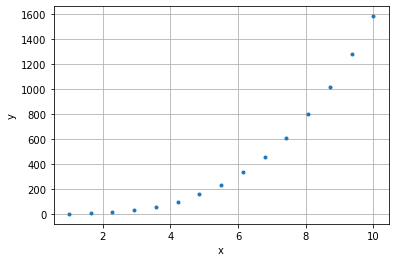

In [2]:
x = np.linspace(1, 10, 15)
y = x**3.2

plt.plot(x, y, '.')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

If we take the log of each side of the equation, we get,

$$\log(y) = \log(x^a)$$
or
$$\log(y) = a\log(x).$$

If we replace $\log(y)$ with the dummy variable $v$ and $\log(x)$ with $u$, we see we get the equation of a straight line with slope $a$.

$$v = au$$

So if we plot our data on an log log plot, we should get a straight line.  As an aside, we could also plot $\log(y)$ vs. $\log(x)$ on a linear plot to see the same thing.

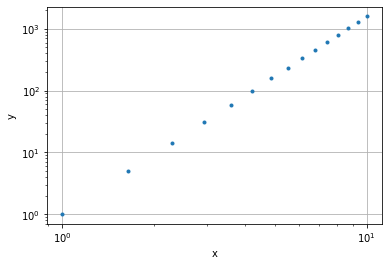

In [3]:
plt.loglog(x, y, '.')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

### Quantstart Code

$$\mbox{var}(\tau) = \left<\left|\log(t + \tau) - \log(\tau)\right|^2\right>$$

Extracting the exponent from:
$$\left<\left|\log(t + \tau) - \log(\tau)\right|^2\right> \sim \tau^{2H}$$

In [16]:
def hurst(ts):
    """
    Returns the Hurst Exponent of the time series vector ts

    Parameters
    ----------
    ts : `numpy.array`
        Time series upon which the Hurst Exponent will be calculated

    Returns
    -------
    'float'
        The Hurst Exponent from the poly fit output
    """
    # Create the range of lag values
    N_lags = 100
    lags = np.arange(2, N_lags)

    # Calculate the array of the variances of the lagged differences
    tau = [np.sqrt(np.std(ts[lag:] - ts[:-lag])) for lag in lags]

    # Use a linear fit to estimate the Hurst Exponent
    poly = np.polyfit(np.log(lags), np.log(tau), 1)

    # Return the Hurst exponent from the polyfit output
    return poly[0]*2.0, lags, tau

In [5]:
N = 100000
gbm = np.log(np.cumsum(np.random.randn(N))+1000)
mr = np.log(np.random.randn(N)+1000)
tr = np.log(np.cumsum(np.random.randn(N)+1)+1000)

In [6]:
H_gbm, lags_gbm, tau_gbm = hurst(gbm)
H_mr, lags_mr, tau_mr = hurst(mr)
H_tr, lags_tr, tau_tr = hurst(tr)

In [7]:
print(H_gbm)
print(H_mr)
print(H_tr)

0.5059600249550849
1.467881229725093e-05
0.9556512358774943


Text(0, 0.5, 'Variance')

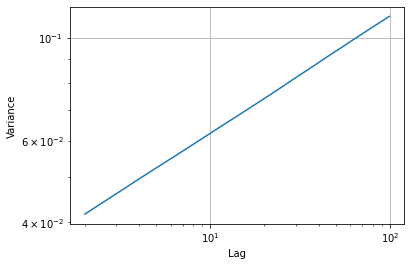

In [8]:
plt.loglog(lags_gbm, tau_gbm)
plt.grid()
plt.xlabel('Lag')
plt.ylabel('Variance')

In [17]:
SPY = pd.read_csv('SPY.csv')
spy = SPY['Adj Close'].values[-252:]

H_spy, lags_spy, tau_spy = hurst(spy)
print(H_spy)

0.21052467223520788
